In [2]:
from random import choices
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import lightgbm as lgb

In [3]:
nbpres = pd.read_excel("NbPresence.xlsx")
nbpres

,date,presence,Event
0,2019-09-01,118,Normal
1,2019-09-02,137,Normal
2,2019-09-03,115,Normal
3,2019-09-04,110,Normal
4,2019-09-05,139,Normal
...,...,...,...
1075,2022-08-11,126,Normal
1076,2022-08-12,0,Weekend
1077,2022-08-13,104,Normal
1078,2022-08-14,136,Normal


In [3]:
for i in nbpres['Event']:
    if(i=="Normal"):
        nbpres['Event']=1
    else:
        nbpres['Event']=0

In [4]:
nbpres

,date,presence,Event
0,2019-09-01,118,1
1,2019-09-02,137,1
2,2019-09-03,115,1
3,2019-09-04,110,1
4,2019-09-05,139,1
...,...,...,...
1075,2022-08-11,126,1
1076,2022-08-12,0,1
1077,2022-08-13,104,1
1078,2022-08-14,136,1


In [45]:
nbpres['date'] = pd.to_datetime(nbpres['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = nbpres.set_index(['date'])
indexedDataset.head(10)

,presence,Event
date,,
2019-09-01,118,1
2019-09-02,137,1
2019-09-03,115,1
2019-09-04,110,1
2019-09-05,139,1
2019-09-06,0,1
2019-09-07,103,1
2019-09-08,125,1
2019-09-09,124,1


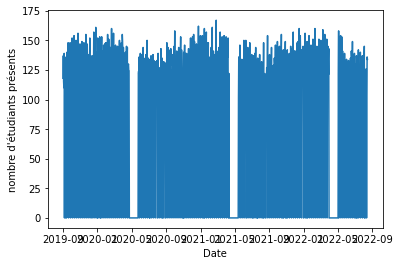

In [46]:
plt.xlabel('Date')
plt.ylabel("nombre d'étudiants présents")
plt.plot(indexedDataset.presence)

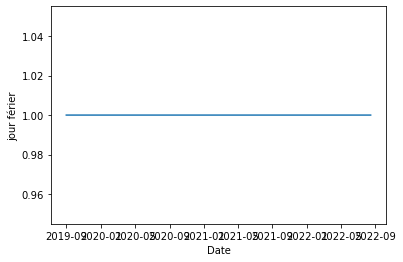

In [8]:
plt.xlabel('Date')
plt.ylabel("jour férier")
plt.plot(indexedDataset.Event)

In [47]:
indexedDataset = indexedDataset.drop(['Event'], axis =1)

In [167]:
train = indexedDataset.presence[:721]
test = indexedDataset.presence[721:]

In [168]:
test

date
2021-08-22    117
2021-08-23    127
2021-08-24    118
2021-08-25    116
2021-08-26    154
             ... 
2022-08-11    126
2022-08-12      0
2022-08-13    104
2022-08-14    136
2022-08-15    134
Name: presence, Length: 359, dtype: int64

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [170]:
train = train.values.reshape(-1,1)
test = test.values.reshape(-1,1)

In [115]:
train

array([[118],
       [137],
       [115],
       [110],
       [139],
       [  0],
       [103],
       [125],
       [124],
       [  0],
       [122],
       [136],
       [  0],
       [111],
       [140],
       [114],
       [119],
       [132],
       [148],
       [  0],
       [104],
       [128],
       [125],
       [132],
       [115],
       [148],
       [  0],
       [100],
       [139],
       [121],
       [120],
       [118],
       [152],
       [  0],
       [ 94],
       [116],
       [139],
       [115],
       [125],
       [154],
       [  0],
       [110],
       [135],
       [135],
       [123],
       [123],
       [150],
       [  0],
       [ 98],
       [125],
       [131],
       [125],
       [127],
       [156],
       [  0],
       [121],
       [132],
       [142],
       [129],
       [126],
       [147],
       [  0],
       [ 87],
       [135],
       [134],
       [117],
       [129],
       [149],
       [  0],
       [111],
       [124],
      

In [171]:
scaler.fit(train)
scaled_train_data = scaler.transform(train)
scaled_test_data = scaler.transform(test)

In [206]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [207]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [208]:
lstm_model.fit_generator(generator,epochs=30)

C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
709/709 [==============================] - 13s 11ms/step - loss: 0.1251
Epoch 2/30
709/709 [==============================] - 7s 11ms/step - loss: 0.1034
Epoch 3/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0828
Epoch 4/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0691
Epoch 5/30
709/709 [==============================] - 7s 10ms/step - loss: 0.0673
Epoch 6/30
709/709 [==============================] - 7s 10ms/step - loss: 0.0643
Epoch 7/30
709/709 [==============================] - 7s 10ms/step - loss: 0.0492
Epoch 8/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0430
Epoch 9/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0330
Epoch 10/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0426
Epoch 11/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0329
Epoch 12/30
709/709 [==============================] - 8s 11ms/step - loss: 0.0305
Epoch 13/30


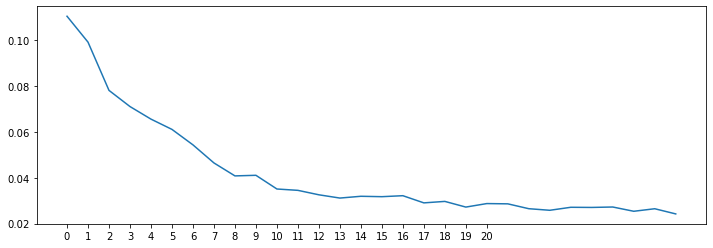

In [209]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [210]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [211]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [212]:
lstm_predictions

array([[109.96417725],
       [122.68282986],
       [119.19156247],
       [119.96231872],
       [ 86.71274519],
       [ 32.14769082],
       [ 85.50607449],
       [111.25617343],
       [116.92985994],
       [117.76941806],
       [118.14964002],
       [126.27034223],
       [  4.06547989],
       [ 99.23953491],
       [124.6355809 ],
       [127.21681601],
       [124.88801372],
       [121.14729971],
       [133.94402134],
       [ -3.32529479],
       [ 91.39882809],
       [123.63025922],
       [128.76453978],
       [125.21693289],
       [120.70366096],
       [136.93700266],
       [ -3.47066514],
       [ 97.56103581],
       [127.63457441],
       [130.61364007],
       [126.41181809],
       [121.70809674],
       [136.74198437],
       [ -3.76045524],
       [ 96.95444053],
       [127.12518966],
       [130.42584836],
       [126.29553574],
       [121.61199111],
       [137.61058819],
       [ -4.07051162],
       [ 97.79178888],
       [127.67557484],
       [130

In [213]:
listLSTM = lstm_predictions.tolist()

In [214]:
listLSTM2 = []
for i in listLSTM:
    listLSTM2.append(i[0])

In [215]:
listLSTM2

[109.96417725086212,
 122.68282985687254,
 119.19156247377394,
 119.96231871843337,
 86.71274518966675,
 32.14769081771374,
 85.506074488163,
 111.25617343187332,
 116.92985993623734,
 117.76941806077956,
 118.14964002370833,
 126.2703422307968,
 4.065479889512062,
 99.23953491449356,
 124.63558089733122,
 127.21681600809096,
 124.88801372051238,
 121.14729970693587,
 133.94402134418488,
 -3.32529479265213,
 91.39882808923721,
 123.63025921583174,
 128.76453977823257,
 125.21693289279936,
 120.7036609649658,
 136.937002658844,
 -3.470665141940117,
 97.56103581190109,
 127.63457441329955,
 130.61364006996155,
 126.41181808710097,
 121.70809674262999,
 136.7419843673706,
 -3.7604552358388896,
 96.95444053411484,
 127.12518966197966,
 130.42584836483002,
 126.29553574323653,
 121.61199110746382,
 137.61058819293976,
 -4.070511624217033,
 97.79178887605667,
 127.67557483911513,
 130.7850176692009,
 126.50662970542906,
 121.75155580043791,
 137.79738450050354,
 -4.2059852331876755,
 98.1752

In [216]:
listTest = []
for i in test:
    listTest.append(i[0])

In [217]:
prevision = {
  "Test": listTest,
  "Lstm Result" : listLSTM2,
}
timeSeriesPrev = pd.DataFrame(prevision)

In [222]:
timeSeriesPrev.head(50)

,Test,Lstm Result
0,117,109.964177
1,127,122.682830
2,118,119.191562
3,116,119.962319
4,154,86.712745
5,0,32.147691
6,101,85.506074
7,127,111.256173
8,126,116.929860
9,125,117.769418


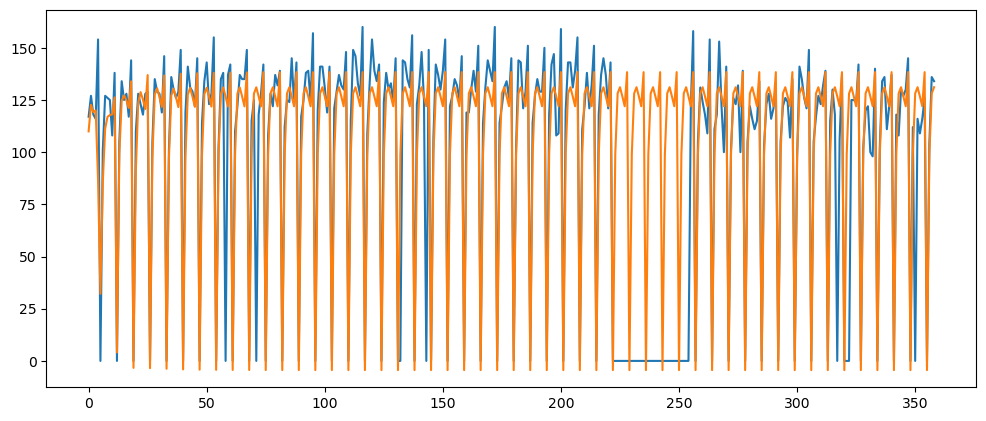

In [219]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(timeSeriesPrev)

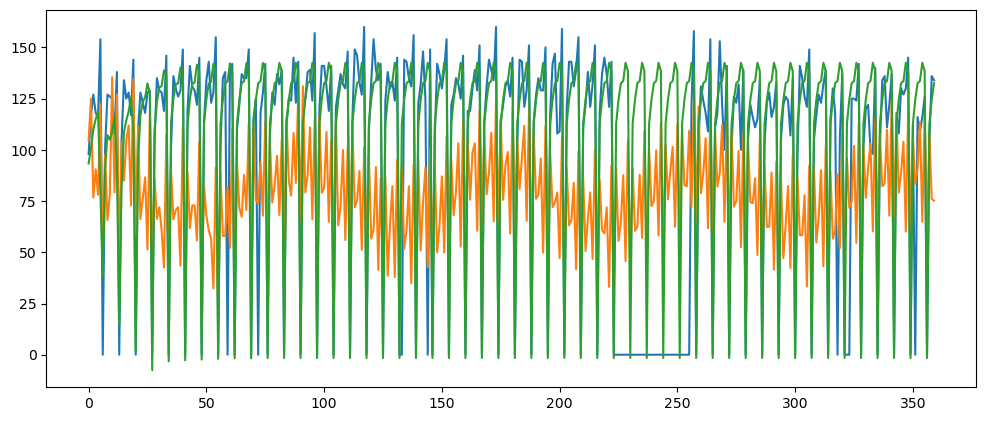

In [220]:
plt.figure(figsize=(12,5), dpi=100)
sah = pd.read_excel('ResultTimeSeriesPrev2.xlsx')
plt.plot(sah)